In [1]:
#Does a higher qualifying position lead to a higher chance of winning?

In [2]:
import pandas as pd

In [3]:
df_qual = pd.read_csv('qualifying.csv')


In [4]:
df_qual = df_qual[["raceId", "driverId", "position"]]
#Winners of qualifying
df_qual = df_qual[(df_qual["position"] == 1)].reset_index(drop=True)

In [5]:
df_qual.head()

,raceId,driverId,position
0,18,1,1
1,19,13,1
2,20,9,1
3,21,8,1
4,22,13,1


In [6]:
df_qual.shape

(459, 3)

In [7]:
df_results = pd.read_csv('results.csv')
df_results = df_results[['raceId', 'driverId', 'position']].reset_index(drop=True)

In [8]:
df_results.shape

(26060, 3)

In [9]:
df_results = df_results.rename(columns={"position":"result"})
df_qual = df_qual.rename(columns={"position": "qualifying_position"})


In [10]:
df_results.head()

,raceId,driverId,result
0,18,1,1
1,18,2,2
2,18,3,3
3,18,4,4
4,18,5,5


In [11]:
df = df_qual.merge(df_results, how="inner", on=["raceId", "driverId"])

df.head()

,raceId,driverId,qualifying_position,result
0,18,1,1,1
1,19,13,1,\N
2,20,9,1,3
3,21,8,1,1
4,22,13,1,1


In [12]:
df["result"].value_counts()

1     229
2      83
\N     62
3      35
4      18
5       7
8       6
6       5
9       4
7       3
12      2
14      2
13      1
10      1
15      1
Name: result, dtype: int64

In [13]:
df = df.replace(r"\N", "DNF")

In [14]:
s = df["result"].value_counts()

<AxesSubplot: xlabel='result', ylabel='count'>

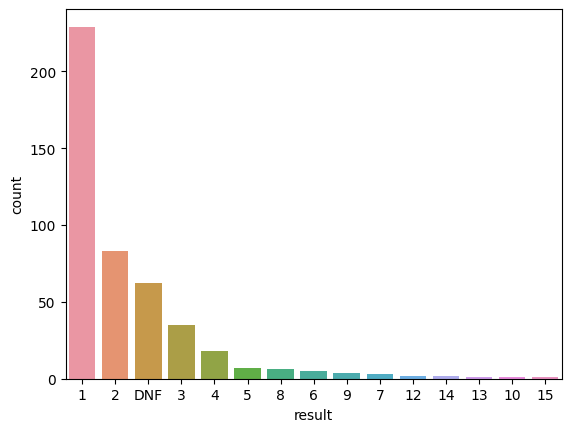

In [15]:
import seaborn as sns
sns.countplot(data=df, x="result", order=df["result"].value_counts().index)

<AxesSubplot: xlabel='difference in pos', ylabel='count'>

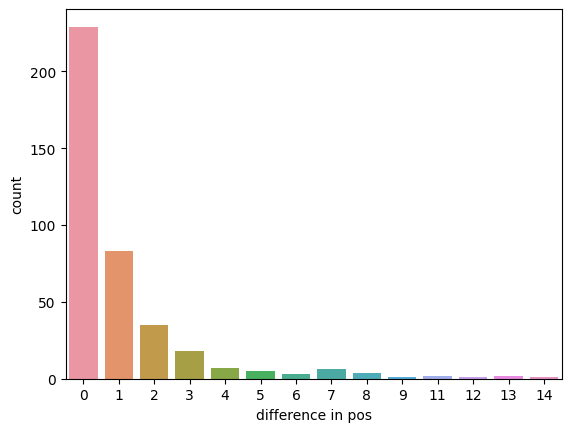

In [16]:
df = df[~(df["result"] == "DNF")]
df["result"] = df["result"].astype(int)
df["difference in pos"] = df["result"] - df["qualifying_position"]
sns.countplot(x=df["difference in pos"])

Here the distribution seems to be exponential

In [17]:
#Now lets explore the general population
df_qual = pd.read_csv('qualifying.csv')
df_results = pd.read_csv('results.csv')
df_qual = df_qual[["raceId", "driverId", "position"]]
df_results = df_results[["raceId", "driverId", "position"]]
df_results = df_results.rename(columns={"position":"result"})
df_qual = df_qual.rename(columns={"position": "qualifying_position"})

df_gen = df_qual.merge(df_results, how="inner", on=["raceId", "driverId"])
df_gen = df_gen.replace(r"\N", 0)
df_gen.head()


,raceId,driverId,qualifying_position,result
0,18,1,1,1
1,18,9,2,0
2,18,5,3,5
3,18,13,4,0
4,18,2,5,2


In [18]:
df_gen.dtypes

raceId                  int64
driverId                int64
qualifying_position     int64
result                 object
dtype: object

In [19]:
df_gen["result"] = df_gen["result"].astype(int)
#DNFs could skew the data so, lets remove them for this
df2 = df_gen[~(df_gen["result"] == 0)]

In [20]:
df2["Difference in pos"] = df2["result"] - df2["qualifying_position"]

/var/folders/wm/j6zh4bsx5kd608f73_8dxtn40000gn/T/ipykernel_46685/3503580131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Difference in pos"] = df2["result"] - df2["qualifying_position"]


<AxesSubplot: xlabel='Difference in pos', ylabel='count'>

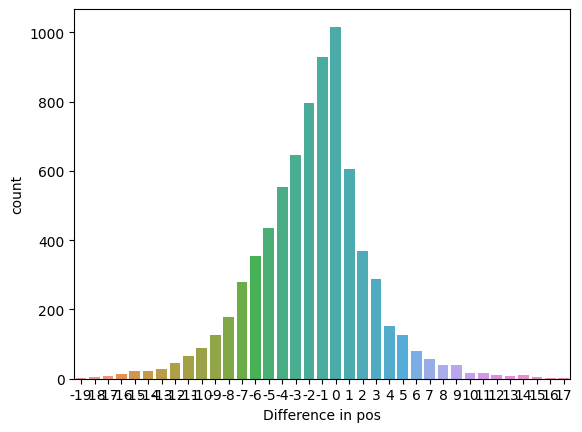

In [21]:
sns.countplot(data=df2, x="Difference in pos")

Interestingly, the distribution is approximately normal

<AxesSubplot: xlabel='qualifying_position', ylabel='result'>

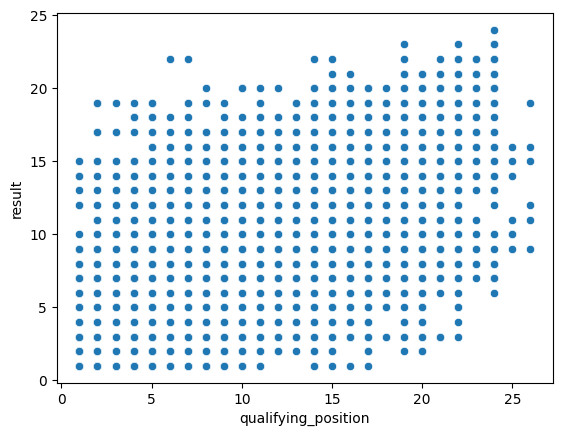

In [22]:
sns.scatterplot(data=df2, x="qualifying_position", y="result")

In [23]:
df2.corr()

,raceId,driverId,qualifying_position,result,Difference in pos
raceId,1.000000,0.657494,0.011092,0.114908,0.124588
driverId,0.657494,1.000000,0.164803,0.244668,0.056086
qualifying_position,0.011092,0.164803,1.000000,0.742834,-0.570028
result,0.114908,0.244668,0.742834,1.000000,0.126622
Difference in pos,0.124588,0.056086,-0.570028,0.126622,1.000000


The qualifying position gives a good correlation to the results. But is there a specific cutoff? Gonna try top three and then top 10

In [26]:
def top_three(x):
    if x >=1 and x <=3:
        return 1
    else:
        return 0
    
df2["Top Three?"] = df2["result"].apply(lambda x: top_three(x))

import scipy.stats as stats
stats.pointbiserialr(df2["Top Three?"], df2["result"])

/var/folders/wm/j6zh4bsx5kd608f73_8dxtn40000gn/T/ipykernel_46685/3973705481.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Top Three?"] = df2["result"].apply(lambda x: top_three(x))


PointbiserialrResult(correlation=-0.641010647562235, pvalue=0.0)